# !pip install torch-snippets==0.426

In [1]:
import torchvision
torchvision.__version__

'0.10.0+cu102'

In [5]:
!pip install torch-snippets==0.426

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 209 kB 10.6 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 51 kB 6.2 MB/s 


!pip install fastcore

In [6]:
from torch_snippets import *
from PIL import Image
IMAGE_ROOT = '/content/drive/MyDrive/Vision Artificial/Data/Imagenes' # Carpeta donde se encuentran las imágenes
DF_RAW = df = pd.read_csv('/content/drive/MyDrive/Vision Artificial/Data/df_raw.csv')

#IMAGE_ROOT = '/content/drive/MyDrive/DAIA_PUCP/Modulo2/DAVA/Proyecto/Data/Coleccion-de-imagenes-master/Imagenes'
#DF_RAW = df = pd.read_csv('/content/drive/MyDrive/DAIA_PUCP/Modulo2/DAVA/Proyecto/Outputs/df_raw.csv')

2021-08-06 02:17:46.399 | WARNING  | torch_snippets.torch_loader:<module>:233 - Not importing Lightning Report
2021-08-06 02:17:47.251 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Normalizing these coordinates means you rescale them to the 0-1 range, by dividing by the image width and height.
DF_RAW['xmin']=DF_RAW['xmin']/DF_RAW['width']
DF_RAW['xmax']=DF_RAW['xmax']/DF_RAW['width']

DF_RAW['ymin']=DF_RAW['ymin']/DF_RAW['height']
DF_RAW['ymax']=DF_RAW['ymax']/DF_RAW['height']

DF_RAW

,filename,width,height,depth,label,pose,truncated,difficult,xmin,ymin,xmax,ymax
0,imagen_0001.png,1280,720,3,Excavadora,NaN,0,0,0.461719,0.448611,0.914062,0.787500
1,imagen_0001.png,1280,720,3,Auto,NaN,0,0,0.019531,0.661111,0.250000,0.925000
2,imagen_0002.png,1280,720,3,Excavadora,NaN,0,0,0.220312,0.252778,0.948438,0.768056
3,imagen_0003.png,1280,720,3,Excavadora,NaN,0,0,0.364844,0.322222,0.570312,0.688889
4,imagen_0004.png,1280,720,3,Excavadora,NaN,1,0,0.000781,0.043056,0.489063,0.498611
...,...,...,...,...,...,...,...,...,...,...,...,...
5502,imagen_1572.png,3840,2160,3,Camion_minero,NaN,0,0,0.538281,0.711574,0.602604,0.804167
5503,imagen_1572.png,3840,2160,3,Camion,NaN,0,0,0.067448,0.372222,0.084635,0.398148
5504,imagen_1572.png,3840,2160,3,Bulldozer,NaN,1,0,0.913802,0.849537,1.000000,0.922222
5505,imagen_1572.png,3840,2160,3,Excavadora,NaN,0,0,0.527344,0.496759,0.634115,0.701389


In [8]:
label2target = {l:t+1 for t,l in enumerate(DF_RAW['label'].unique())}
label2target['background'] = 0
target2label = {t:l for l,t in label2target.items()}
background_class = label2target['background']
num_classes = len(label2target)

In [9]:
# Load
import pickle
with open('/content/drive/MyDrive/Vision Artificial/models/FasterRCNN/label2target_SGD.txt','rb') as fp:
  label2target = pickle.load(fp)
with open('/content/drive/MyDrive/Vision Artificial/models/FasterRCNN/target2label_SGD.txt','rb') as fp:
  target2label = pickle.load(fp)

In [10]:
label2target, num_classes

({'Auto': 2,
  'Bulldozer': 3,
  'Camion': 5,
  'Camion_minero': 4,
  'Camioneta': 6,
  'Excavadora': 1,
  'Otro': 7,
  'Persona': 8,
  'background': 0},
 9)

In [12]:
def preprocess_image(img):
    img = torch.tensor(img).permute(2,0,1)
    return img.to(device).float()

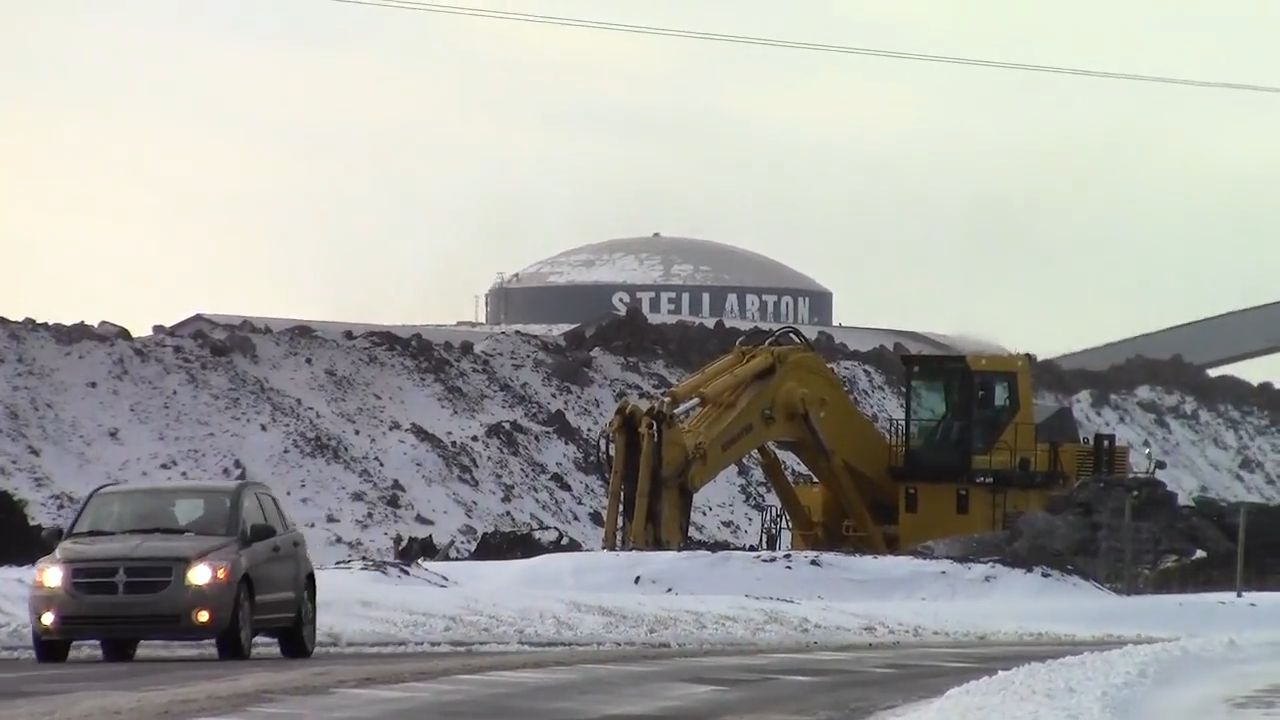

In [13]:
img = Image.open(IMAGE_ROOT +'/'+ DF_RAW.filename[0]).convert("RGB")
img

In [ ]:
img = np.array(img.resize((400,400), resample=Image.BILINEAR))/255.
img

array([[[0.94117647, 0.9372549 , 0.89411765],
        [0.94117647, 0.9372549 , 0.89411765],
        [0.94117647, 0.9372549 , 0.89411765],
        ...,
        [0.9254902 , 0.95686275, 0.88627451],
        [0.9254902 , 0.95686275, 0.89411765],
        [0.9254902 , 0.95686275, 0.89411765]],

       [[0.94117647, 0.9372549 , 0.89411765],
        [0.94117647, 0.9372549 , 0.89411765],
        [0.94117647, 0.9372549 , 0.89411765],
        ...,
        [0.9254902 , 0.95686275, 0.88627451],
        [0.9254902 , 0.95686275, 0.89411765],
        [0.9254902 , 0.95686275, 0.89411765]],

       [[0.94117647, 0.9372549 , 0.89411765],
        [0.94117647, 0.9372549 , 0.89411765],
        [0.94117647, 0.9372549 , 0.89411765],
        ...,
        [0.9254902 , 0.95686275, 0.88627451],
        [0.9254902 , 0.95686275, 0.89411765],
        [0.9254902 , 0.95686275, 0.89411765]],

       ...,

       [[0.53333333, 0.49803922, 0.50588235],
        [0.5372549 , 0.50196078, 0.50980392],
        [0.53333333, 0

In [ ]:
img = Image.open(IMAGE_ROOT +'/'+ DF_RAW.filename[0]).convert("RGB")
img = np.array(img.resize((400,400), resample=Image.BILINEAR))/255.
img = preprocess_image(img)
img.shape

torch.Size([3, 400, 400])

In [ ]:
w, h = 400, 400 #224, 224
data = DF_RAW[['xmin','ymin','xmax','ymax']].values
data

array([[0.46171875, 0.44861111, 0.9140625 , 0.7875    ],
       [0.01953125, 0.66111111, 0.25      , 0.925     ],
       [0.2203125 , 0.25277778, 0.9484375 , 0.76805556],
       ...,
       [0.91380208, 0.84953704, 1.        , 0.92222222],
       [0.52734375, 0.49675926, 0.63411458, 0.70138889],
       [0.27213542, 0.44027778, 0.36510417, 0.60694444]])

In [ ]:
data[:,[0,2]] *= w
data

array([[1.84687500e+02, 4.48611111e-01, 3.65625000e+02, 7.87500000e-01],
       [7.81250000e+00, 6.61111111e-01, 1.00000000e+02, 9.25000000e-01],
       [8.81250000e+01, 2.52777778e-01, 3.79375000e+02, 7.68055556e-01],
       ...,
       [3.65520833e+02, 8.49537037e-01, 4.00000000e+02, 9.22222222e-01],
       [2.10937500e+02, 4.96759259e-01, 2.53645833e+02, 7.01388889e-01],
       [1.08854167e+02, 4.40277778e-01, 1.46041667e+02, 6.06944444e-01]])

In [ ]:
data[:,[1,3]] *= h
data

array([[184.6875    , 179.44444444, 365.625     , 315.        ],
       [  7.8125    , 264.44444444, 100.        , 370.        ],
       [ 88.125     , 101.11111111, 379.375     , 307.22222222],
       ...,
       [365.52083333, 339.81481481, 400.        , 368.88888889],
       [210.9375    , 198.7037037 , 253.64583333, 280.55555556],
       [108.85416667, 176.11111111, 146.04166667, 242.77777778]])

In [24]:
class OpenDataset(torch.utils.data.Dataset):
    w, h = 400,400#224, 224
    def __init__(self, df, image_dir=IMAGE_ROOT):
        self.image_dir = image_dir
        self.files = glob.glob(self.image_dir+'/*')
        self.df = df
        self.image_infos = df.filename.unique()

    def __getitem__(self, ix):
        # load images and masks
        image_id = self.image_infos[ix]
        img_path = find(image_id, self.files)
        img = Image.open(img_path).convert("RGB")
        img = np.array(img.resize((self.w, self.h), resample=Image.BILINEAR))/255.
        data = df[df['filename'] == image_id]
        labels = data['label'].values.tolist()
        data = data[['xmin','ymin','xmax','ymax']].values
        data[:,[0,2]] *= self.w
        data[:,[1,3]] *= self.h
        boxes = data.astype(np.uint32).tolist() # convert to absolute coordinates
        # torch FRCNN expects ground truths as a dictionary of tensors
        target = {}
        target["boxes"] = torch.Tensor(boxes).float()
        target["labels"] = torch.Tensor([label2target[i] for i in labels]).long()
        img = preprocess_image(img)
        return img, target,image_id
    def collate_fn(self, batch):
        return tuple(zip(*batch)) 

    def __len__(self):
        return len(self.image_infos)

In [25]:
data = DF_RAW[['xmin','ymin','xmax','ymax']].values
data[:,[0,2]] *= 224
data

array([[103.425     ,   0.44861111, 204.75      ,   0.7875    ],
       [  4.375     ,   0.66111111,  56.        ,   0.925     ],
       [ 49.35      ,   0.25277778, 212.45      ,   0.76805556],
       ...,
       [204.69166667,   0.84953704, 224.        ,   0.92222222],
       [118.125     ,   0.49675926, 142.04166667,   0.70138889],
       [ 60.95833333,   0.44027778,  81.78333333,   0.60694444]])

In [26]:
from sklearn.model_selection import train_test_split
trn_ids, val_ids = train_test_split(df.filename.unique(), test_size=0.1, random_state=99, shuffle = True)
trn_df, val_df = df[df['filename'].isin(trn_ids)], df[df['filename'].isin(val_ids)]
print(len(trn_df), len(val_df))

train_ds = OpenDataset(trn_df)
test_ds = OpenDataset(val_df)

train_loader = DataLoader(train_ds, batch_size=2, collate_fn=train_ds.collate_fn, drop_last=True)
test_loader = DataLoader(test_ds, batch_size=2, collate_fn=test_ds.collate_fn, drop_last=True)

5009 498


In [27]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def get_model():
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model
device

'cpu'

In [17]:
# Defining training and validation functions for a single batch
def train_batch(inputs, model, optimizer):
    model.train()
    input, targets,_ = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    optimizer.zero_grad()
    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    loss.backward()
    optimizer.step()
    return loss, losses

@torch.no_grad() # this will disable gradient computation in the function below
def validate_batch(inputs, model):
    model.train() # to obtain the losses, model needs to be in train mode only. # #Note that here we are not defining the model's forward method 
#and hence need to work per the way the model class is defined
    input, targets,_ = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    optimizer.zero_grad()
    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    return loss, losses

In [ ]:
model = get_model().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001,
                            momentum=0.9, weight_decay=0.005)
n_epochs = 50
log = Report(n_epochs)

In [19]:
model = torch.load('/content/drive/MyDrive/Vision Artificial/models/FasterRCNN/model_fastetr_rcnn_50epochs_SGD.pth',
                   map_location=torch.device(device))

In [ ]:
for epoch in range(n_epochs):
    _n = len(train_loader)
    for ix, inputs in enumerate(train_loader):
        loss, losses = train_batch(inputs, model, optimizer)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
            [losses[k] for k in ['loss_classifier','loss_box_reg','loss_objectness','loss_rpn_box_reg']]
        pos = (epoch + (ix+1)/_n)
        log.record(pos, trn_loss=loss.item(), trn_loc_loss=loc_loss.item(), 
                   trn_regr_loss=regr_loss.item(), trn_objectness_loss=loss_objectness.item(),
                   trn_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')

    _n = len(test_loader)
    for ix,inputs in enumerate(test_loader):
        loss, losses = validate_batch(inputs, model)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
          [losses[k] for k in ['loss_classifier','loss_box_reg','loss_objectness','loss_rpn_box_reg']]
        pos = (epoch + (ix+1)/_n)
        log.record(pos, val_loss=loss.item(), val_loc_loss=loc_loss.item(), 
                  val_regr_loss=regr_loss.item(), val_objectness_loss=loss_objectness.item(),
                  val_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')
    if (epoch+1)%(n_epochs//10)==0: log.report_avgs(epoch+1)

C:\Users\USUARIO\.conda\envs\env_dava\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


EPOCH: 5.000	trn_loss: 0.418	trn_loc_loss: 0.181	trn_regr_loss: 0.198	trn_objectness_loss: 0.013	trn_rpn_box_reg_loss: 0.027	val_loss: 0.373	val_loc_loss: 0.153	val_regr_loss: 0.179	val_objectness_loss: 0.012	val_rpn_box_reg_loss: 0.029	(2626.96s - 23642.61s remaining)
EPOCH: 10.000	trn_loss: 0.303	trn_loc_loss: 0.125	trn_regr_loss: 0.148	trn_objectness_loss: 0.008	trn_rpn_box_reg_loss: 0.023	val_loss: 0.312	val_loc_loss: 0.121	val_regr_loss: 0.153	val_objectness_loss: 0.009	val_rpn_box_reg_loss: 0.028	(5258.63s - 21034.52s remaining)
EPOCH: 15.000	trn_loss: 0.249	trn_loc_loss: 0.097	trn_regr_loss: 0.125	trn_objectness_loss: 0.006	trn_rpn_box_reg_loss: 0.021	val_loss: 0.295	val_loc_loss: 0.110	val_regr_loss: 0.145	val_objectness_loss: 0.011	val_rpn_box_reg_loss: 0.029	(7892.63s - 18416.14s remaining)
EPOCH: 20.000	trn_loss: 0.214	trn_loc_loss: 0.079	trn_regr_loss: 0.110	trn_objectness_loss: 0.005	trn_rpn_box_reg_loss: 0.019	val_loss: 0.290	val_loc_loss: 0.107	val_regr_loss: 0.140	val_o

100%|██████████| 151/151 [00:01<00:00, 128.94it/s]


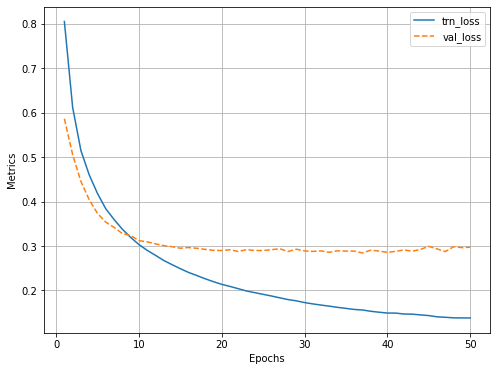

In [ ]:
log.plot_epochs(['trn_loss','val_loss'])

In [20]:
from torchvision.ops import nms
def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16)
    labels = np.array([target2label[i] for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy()
    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    bbs, confs, labels = [tensor[ixs] for tensor in [bbs, confs, labels]]

    if len(ixs) == 1:
        bbs, confs, labels = [np.array([tensor]) for tensor in [bbs, confs, labels]]
    return bbs.tolist(), confs.tolist(), labels.tolist()

In [21]:
model.eval()
for ix, (images, targets) in enumerate(test_loader):
    if ix==3: break
    images = [im for im in images]
    #print(images)
    outputs = model(images)
    for ix, output in enumerate(outputs):
        bbs, confs, labels = decode_output(output)
        info = [f'{l}@{c:.2f}' for l,c in zip(labels, confs)]
        print(info)
        show(images[ix].cpu().permute(1,2,0), bbs=bbs, texts=labels, sz=5)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: ignored

In [51]:
pred_boxes = []
true_boxes = []
for img, targets, image_id in test_ds: ##  img, gtbbs, labels, image_id
  gtbbs = targets['boxes'].tolist()
  labels = targets['labels']
  outputs = model([img])
  pred_bbs, pred_confs, pred_labels = decode_output(outputs[0])
  predictions =  [[image_id,target2label[int(pred_cls)] pred_cls,conf,*pred_bb ] 
                  for pred_cls, conf, pred_bb in zip( pred_labels ,pred_confs, pred_bbs)]
  pred_boxes.extend(predictions)
  boxes = [[image_id, label, *bbs] for label, bbs in zip(labels,gtbbs)]
  true_boxes.extend(list(boxes))

In [57]:
pred_boxes[0]

['imagen_0003.png', 'Excavadora', 0.9316648840904236, 157, 126, 219, 262]

In [80]:
true_boxes

[['imagen_0003.png', tensor(1), 145.0, 128.0, 228.0, 275.0],
 ['imagen_0004.png', tensor(1), 0.0, 17.0, 195.0, 199.0],
 ['imagen_0019.png', tensor(3), 70.0, 3.0, 239.0, 250.0],
 ['imagen_0031.png', tensor(5), 181.0, 239.0, 273.0, 351.0],
 ['imagen_0031.png', tensor(1), 207.0, 155.0, 324.0, 280.0],
 ['imagen_0031.png', tensor(1), 2.0, 51.0, 73.0, 132.0],
 ['imagen_0033.png', tensor(4), 0.0, 192.0, 124.0, 285.0],
 ['imagen_0033.png', tensor(1), 87.0, 160.0, 359.0, 382.0],
 ['imagen_0043.png', tensor(4), 22.0, 4.0, 228.0, 322.0],
 ['imagen_0043.png', tensor(3), 212.0, 0.0, 400.0, 151.0],
 ['imagen_0044.png', tensor(4), 114.0, 55.0, 242.0, 264.0],
 ['imagen_0058.png', tensor(4), 98.0, 27.0, 284.0, 400.0],
 ['imagen_0075.png', tensor(4), 185.0, 6.0, 316.0, 272.0],
 ['imagen_0075.png', tensor(3), 86.0, 164.0, 164.0, 305.0],
 ['imagen_0082.png', tensor(4), 71.0, 106.0, 139.0, 199.0],
 ['imagen_0082.png', tensor(1), 92.0, 95.0, 162.0, 294.0],
 ['imagen_0087.png', tensor(1), 79.0, 157.0, 193.0,

In [81]:
target2label[int(true_box[1])] for  in true_boxes

SyntaxError: ignored

In [85]:
for true_box in true_boxes:
  print(target2label[int(true_box[1])])
  true_box[1] = target2label[int(true_box[1])]

Excavadora
Excavadora
Bulldozer
Camion
Excavadora
Excavadora
Camion_minero
Excavadora
Camion_minero
Bulldozer
Camion_minero
Camion_minero
Camion_minero
Bulldozer
Camion_minero
Excavadora
Excavadora
Camion_minero
Camion_minero
Excavadora
Camion_minero
Persona
Camion_minero
Persona
Bulldozer
Camion_minero
Camion_minero
Camion_minero
Camion_minero
Camion_minero
Bulldozer
Bulldozer
Camion_minero
Camion_minero
Bulldozer
Camion_minero
Camion_minero
Camion_minero
Bulldozer
Otro
Camion_minero
Bulldozer
Bulldozer
Camion_minero
Camion_minero
Otro
Camion_minero
Camion_minero
Camion_minero
Camion_minero
Excavadora
Camion_minero
Bulldozer
Otro
Camion_minero
Camion_minero
Camion_minero
Bulldozer
Camion_minero
Otro
Camion_minero
Camion_minero
Bulldozer
Otro
Camion_minero
Excavadora
Camion_minero
Camion_minero
Excavadora
Camion_minero
Excavadora
Camion_minero
Excavadora
Camion_minero
Camion_minero
Camion_minero
Camion_minero
Camion_minero
Camion_minero
Camion_minero
Excavadora
Camion_minero
Camion_min

In [86]:
true_boxes

[['imagen_0003.png', 'Excavadora', 145.0, 128.0, 228.0, 275.0],
 ['imagen_0004.png', 'Excavadora', 0.0, 17.0, 195.0, 199.0],
 ['imagen_0019.png', 'Bulldozer', 70.0, 3.0, 239.0, 250.0],
 ['imagen_0031.png', 'Camion', 181.0, 239.0, 273.0, 351.0],
 ['imagen_0031.png', 'Excavadora', 207.0, 155.0, 324.0, 280.0],
 ['imagen_0031.png', 'Excavadora', 2.0, 51.0, 73.0, 132.0],
 ['imagen_0033.png', 'Camion_minero', 0.0, 192.0, 124.0, 285.0],
 ['imagen_0033.png', 'Excavadora', 87.0, 160.0, 359.0, 382.0],
 ['imagen_0043.png', 'Camion_minero', 22.0, 4.0, 228.0, 322.0],
 ['imagen_0043.png', 'Bulldozer', 212.0, 0.0, 400.0, 151.0],
 ['imagen_0044.png', 'Camion_minero', 114.0, 55.0, 242.0, 264.0],
 ['imagen_0058.png', 'Camion_minero', 98.0, 27.0, 284.0, 400.0],
 ['imagen_0075.png', 'Camion_minero', 185.0, 6.0, 316.0, 272.0],
 ['imagen_0075.png', 'Bulldozer', 86.0, 164.0, 164.0, 305.0],
 ['imagen_0082.png', 'Camion_minero', 71.0, 106.0, 139.0, 199.0],
 ['imagen_0082.png', 'Excavadora', 92.0, 95.0, 162.0, 

In [87]:
import matplotlib.pyplot as plt

def plot_precision_recall_curve(precisions, recalls,ax,cls):
  ax.plot(recalls,precisions,linewidth=4, color ='red')
  ax.set_xlabel('Recall', fontsize = 12, fontweight = 'bold')
  ax.set_ylabel('Precision', fontsize = 12,fontweight = 'bold')
  ax.set_title('Precision-Recall Curve ({})'.format(cls), fontsize = 15,fontweight = 'bold')
  ax.set_ylim(bottom=0)
  ax.set_xlim(left=0)

In [92]:
def calculate_iou(boxA,boxB, epsilon = 1e-5):
  x1 = max(boxA[0],boxB[0])
  y1 = max(boxA[1],boxB[1])
  x2 = min(boxA[2],boxB[2])
  y2 = min(boxA[3],boxB[3])
  width = x2 - x1
  hight = y2 - y1
  if (width < 0) or (hight < 0):
    return 0.0
  area_overlap = width * hight
  area_a = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
  area_b = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
  area_combined = area_a + area_b  - area_overlap
  iou = area_overlap / (area_combined + epsilon)
  return iou

In [93]:
from collections import Counter

def mean_average_precision(pred_boxes,true_boxes, classes,iou_threshold = 0.5):
  """
  Calculate mean average precision

  Paramenters:
      pred_boxes: list of lists containing all prediction bboxes. 
                  Each boxes is like [train_idx, class_prediction, prob_score, x1, y1, x2, y2]
      true_boxes: Similar as pred_boxes except all the correct ones 
      iou_threshold: threshold where predicted bboxes is correct
      classes: classes

  Returns:
    float: mAP value across all classes given a specific IoU threshold
  """
  average_precisions = []
  classes_mAP = {}
  epsilon = 1e-6
  AP_table_info = pd.DataFrame([], columns = ['image','class','confidence',
                                      'iou','iou>0.5','Cum_TP','Cum_FP',
                                      'Precision','Recall'])
  for c in classes:
    detections = []
    ground_truts = []
    
    for detection in pred_boxes:
      if detection[1] == c:
        detections.append(detection)
    
    for true_box in true_boxes:
      if true_box[1] == c:
        ground_truts.append(true_box)
    # amount_bboxes = {'image1':2 , 'image2':5}
    amount_bboxes = Counter([gt[0] for gt in ground_truts])
    for key , val in amount_bboxes.items():
      amount_bboxes[key] = np.zeros(val,dtype=np.int32)
    detections.sort(key = lambda x: x[2], reverse = True)
    TP = np.zeros(len(detections))
    FP = np.zeros(len(detections))
    total_true_bboxes = len(ground_truts)
    detections_ious = []
    if total_true_bboxes == 0:
      continue
    for detection_idx , deteccion in enumerate(detections):
      idx_image = deteccion[0]
      ground_truth_img = [ bbox for bbox in ground_truts if bbox[0] == idx_image]
      num_gts = len(ground_truth_img)
      best_iou = 0
      for idx, gt in enumerate(ground_truth_img):
        iou = calculate_iou(
            deteccion[3:],
            gt[2:])

        if iou > best_iou :
          best_iou = iou
          best_gt_idx = idx

      if best_iou > iou_threshold:
        if isinstance(amount_bboxes[idx_image], np.ndarray) and amount_bboxes[idx_image][best_gt_idx] == 0:
          TP[detection_idx] = 1
        else:
          FP[detection_idx] = 1
      else:
        FP[detection_idx] = 1
      
      detections_ious.append([idx_image,deteccion[1],deteccion[2],best_iou, best_iou > iou_threshold ])

    TP_cumsum = np.cumsum(TP, axis = 0)
    FP_cumsum = np.cumsum(FP, axis = 0)
    recalls = TP_cumsum / (total_true_bboxes + epsilon)
    precisions = TP_cumsum / (TP_cumsum + FP_cumsum + epsilon)
    # Append table info
    AP_class = [ [*_detection,TP_cum,FP_cum,precision,recall] 
                for _detection, TP_cum, FP_cum, precision, recall in zip(detections_ious,TP_cumsum,FP_cumsum,precisions,recalls)]
    AP_table_class = pd.DataFrame(AP_class, columns=AP_table_info.columns)
    AP_table_info = AP_table_info.append(AP_table_class, ignore_index = True)
    # mean precision. Area bajo la curva
    precisions = np.concatenate((np.array([1]), precisions))
    recalls = np.concatenate((np.array([0]), recalls))
    classes_mAP[c] = np.trapz(precisions, recalls)
    average_precisions.append(np.trapz(precisions, recalls))
  mAP = sum(average_precisions) / len(average_precisions)
  return mAP, classes_mAP,AP_table_info

In [94]:
import matplotlib.pyplot as plt

def plot_precision_recall_curve(precisions, recalls,ax,cls):
  ax.plot(recalls,precisions,linewidth=4, color ='red')
  ax.set_xlabel('Recall', fontsize = 12, fontweight = 'bold')
  ax.set_ylabel('Precision', fontsize = 12,fontweight = 'bold')
  ax.set_title('Precision-Recall Curve ({})'.format(cls), fontsize = 15,fontweight = 'bold')
  ax.set_ylim(bottom=0)
  ax.set_xlim(left=0)

In [95]:
classes = [ key for key in label2target.keys() if key != 'background']
classes
mAP , classes_mAP ,  AP_table_info = mean_average_precision(pred_boxes,true_boxes,classes,0.7)
print('mAP:', mAP)
classes_mAP

mAP: 0.4252686002546636


{'Auto': 0.06824720299412668,
 'Bulldozer': 0.526613039730114,
 'Camion': 0.4879846480069937,
 'Camion_minero': 0.6918975888143484,
 'Camioneta': 0.23593737022795672,
 'Excavadora': 0.675410635314226,
 'Otro': 0.35798017537265947,
 'Persona': 0.35807814157688433}

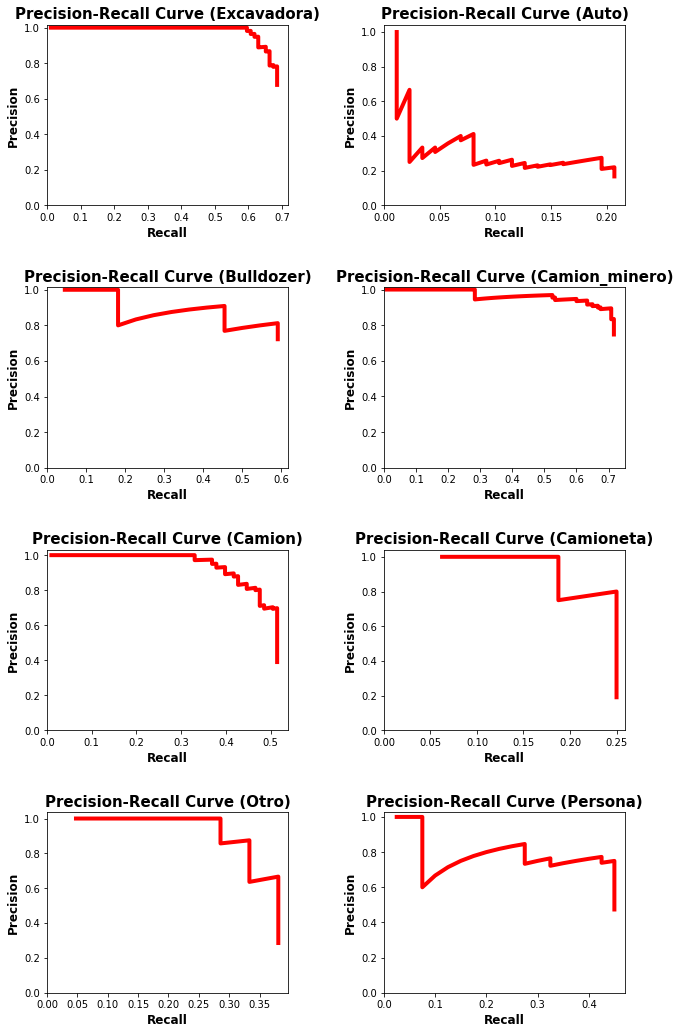

In [96]:
figure, ax = plt.subplots(int(len(classes_mAP) / 2) + len(classes_mAP) %2 , 2, figsize=(10,15))

for idx ,cls in enumerate(classes_mAP.keys()):
  AP_table_class = AP_table_info[AP_table_info['class'] == cls]
  precisions = AP_table_class['Precision'].values.tolist()
  recalls = AP_table_class['Recall'].values.tolist()
  plot_precision_recall_curve(
      precisions,recalls,
      ax=ax[int(idx /2)][idx %2],
      cls= cls)
figure.tight_layout(pad=3.0)

In [71]:
classes

['Excavadora',
 'Auto',
 'Bulldozer',
 'Camion_minero',
 'Camion',
 'Camioneta',
 'Otro',
 'Persona']

In [ ]:
# save 
torch.save(model, '../Models/model_fastetr_rcnn_50epochs_SGD.pth')

import pickle
with open('../Models/label2target_SGD.txt','wb') as fp:
  pickle.dump(label2target,fp)

with open('../Models/target2label_SGD.txt','wb') as fp:
  pickle.dump(target2label,fp)